## Project Title: Jewelry Price Optimization with ML

##### Client: Gemineye
##### Domain: Retail – Luxury Goods & E-commerce
##### Objective: To develop a predictive pricing model for jewelry items based on product attributes and historical sales data using machine learning.

#### Introduction:
Gemineye is a premium jewelry brand specializing in customized and ready-to-sell products featuring diverse materials such as gold, silver, diamonds, and precious gems. With increasing competition in the luxury retail space, the company seeks to implement data-driven pricing mechanisms to optimize profitability without compromising on brand perception.

Jewelry pricing is traditionally determined through manual markup models or subjective expert judgment, which may not consistently reflect real-time market dynamics, customer preferences, or inventory pressure. This project aims to replace static pricing methods with a dynamic machine learning-based model capable of adjusting and recommending prices based on product features, market trends, and historical data.

##### Business Goals:
- Identify the key features that influence jewelry prices.
- Build a predictive model to estimate optimal pricing for new or existing products.
- Support data-driven decision-making for pricing, promotions, and inventory planning.
- Improve revenue and customer satisfaction by aligning prices with market expectations and perceived product value.

##### Stakeholders Expectations:
This project involves multiple stakeholders, each with distinct roles and expectations. 
- Head of Pricing Strategy: Seeks actionable price recommendations based on predictive modeling.
- Sales & Marketing Director: Expects insights on which features influence perceived value.
- Data Science Team	: Require a maintainable, trackable pipeline with performance benchmarks.
- Executive Leadership:	Interested in ROI through pricing accuracy and improved revenue margins.

##### Dataset Description:
* Order datetime -	Date product was ordered
* Order ID - Identifier for order
* Purchased product ID - Identifier for product ordered
* Quantity of SKU in the order - Amount of stock keeping unit ordered
* Category ID	- Jewelry category identifier
* Category alias -Jewelry category
* Brand ID - Brand identifier
* Price in USD	-Jewelry price
* User ID	- User identifier
* Product gender (for male/female) -Target gender for product
* Main Color - Main color of the jewelry piece
* Main metal - The main metal used for mounting of the piece
* Main gem - What gem type mounted on the jewelry piece

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split 
#from sklearn import metrics
from datetime import datetime
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import os
print(os.getcwd())

C:\Users\IfeomaAugustaAdigwe\Desktop\JewlryPriceOptimisation\notebooks


### The Jewelry Dataset

In [3]:
# import the dataset

data = pd.read_csv('../data/Jewelry_Dataset.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [4]:
# Since the dataset didnt load with the correct headername, define correct column names as a list
columns = [
    "Order datetime",
    "Order ID",
    "Purchased product ID",
    "Quantity of SKU",
    "Category ID",
    "Category alias",
    "Brand ID",
    "Price in USD",
    "User ID",
    "Product gender",
    "Main Color",
    "Main metal",
    "Main gem"
]

data.columns = columns
data.head(3)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [5]:
data.tail(2)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
95909,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit
95910,2021-12-01 09:59:07 UTC,2719022379232658075,1956663846156370429,1,1.806829e+18,jewelry.pendant,1.0,97.12,1.515916e+18,NaN,red,gold,NaN


In [6]:
# Drop first row which contains old header
data = data.drop(index=0).reset_index(drop=True)

In [7]:
import warnings
warnings.filterwarnings("ignore")

### Data Ingestion

In [8]:
print(data.columns)

Index(['Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU',
       'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
       'Product gender', 'Main Color', 'Main metal', 'Main gem'],
      dtype='object')


In [9]:
## Check the shape of the data

data.shape

(95910, 13)

In [10]:
data.describe()

,Order ID,Purchased product ID,Quantity of SKU,Category ID,Brand ID,Price in USD,User ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [11]:
## Check the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order datetime        95910 non-null  object 
 1   Order ID              95910 non-null  int64  
 2   Purchased product ID  95910 non-null  int64  
 3   Quantity of SKU       95910 non-null  int64  
 4   Category ID           90558 non-null  float64
 5   Category alias        85977 non-null  object 
 6   Brand ID              91125 non-null  float64
 7   Price in USD          90558 non-null  float64
 8   User ID               90558 non-null  float64
 9   Product gender        47743 non-null  object 
 10  Main Color            88250 non-null  object 
 11  Main metal            90448 non-null  object 
 12  Main gem              61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [12]:
data.isnull()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,False,False,False,False,False,True,True,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,False,False,False,False,True,False,False,True,True,True,True,True,True
95906,False,False,False,False,False,True,False,False,False,True,False,False,True
95907,False,False,False,False,False,False,False,False,False,False,False,False,False
95908,False,False,False,False,False,False,False,False,False,True,False,False,False


In [13]:
# Show the missing values

data.isna().sum()

Order datetime              0
Order ID                    0
Purchased product ID        0
Quantity of SKU             0
Category ID              5352
Category alias           9933
Brand ID                 4785
Price in USD             5352
User ID                  5352
Product gender          48167
Main Color               7660
Main metal               5462
Main gem                34058
dtype: int64

### Check for Unique values

In [14]:
# show all values in a column - Category alias

unique_categories = np.array(data["Category alias"].unique())
print(unique_categories)

[nan 'jewelry.pendant' 'jewelry.necklace' 'jewelry.earring' 'jewelry.ring'
 'jewelry.brooch' 'jewelry.bracelet' 'electronics.clocks'
 'jewelry.souvenir' '230.12' '202.36' '1098.03' '321.78' '1128.62' '81.27'
 '34.25' '582.16' '227.37' '234.22' '150.55' '131.82' '2123.15' '109.45'
 '49.22' '472.47' '205.38' '2746.44' '51.08' '231.12' '76.97' '3054.73'
 '184.90' '380.10' '357.49' '15.47' '135.33' '719.75' '93.01' '177.95'
 'jewelry.stud' '102.10' '595.75' '469.56' '427.07' '53.62' '77.53'
 '1469.18' '355.27' '184.89' '154.66' '300.58' '83.73' '271.19' '3294.21'
 '278.04' '3626.26' '126.03' '283.52' '114.38' '89.04' '8.22' '124.88'
 '89.73' '171.23' '136.93' '19.04' '158.77' '187.10' '151.92' '1845.89'
 '87.23' '248.58' '596.48' '208.88' '193.11' '169.84' '1447.68' '45.07'
 '136.85' '282.05' '61.51' '210.21' '137.12' '147.81' '419.45' '825.27'
 '300.16' '541.78' '308.74' '766.85' '410.82' '101.23' '2.88' '1356.16'
 '13.42' '35.21' '134.79' '626.58' '13.70' '108.53' '119.01' '7.40' '4.79'


In [15]:
data["Main metal"].unique()

array(['gold', 'silver', nan, 'platinum'], dtype=object)

In [16]:
data["Main Color"].unique()

array(['yellow', 'white', 'red', nan, 'unknown-color', 'black'],
      dtype=object)

In [17]:
data["Product gender"].unique()

array([nan, 'f', 'm'], dtype=object)

In [18]:
data["Category ID"].unique()

array([1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18,            nan, 1.80682920e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18])

In [19]:
# show all values in a column - Price in USD

unique_prices = np.array(data["Price in USD"].unique())
#print(unique_prices.tolist())  

In [20]:
# show the lowest and highest prices in the column - Price in USD

lowest_price = np.min(data["Price in USD"])
highest_price = np.max(data["Price in USD"])

print(f"Lowest Price: {lowest_price}")
print(f"Highest Price: {highest_price}")

Lowest Price: 0.99
Highest Price: 34448.6


In [21]:
# Check for unique categories

print("Unique Categories:", data['Category alias'].nunique())
print("Unique Brands:", data['Brand ID'].nunique())
print("Unique Metals:", data['Main metal'].nunique())

Unique Categories: 218
Unique Brands: 2537
Unique Metals: 3


# Data Cleaning!

In [22]:
# Change the values in Column - Product gender

data["Product gender"] = data["Product gender"].replace({'f': 'female', 'm': 'male'})
data.head(3)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,female,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,female,red,gold,diamond


In [23]:
## Clean the messy Category alias column - show the relevant values

import re

filtered_categories = np.array([cat for cat in data["Category alias"].unique() if isinstance(cat, str) and not re.match(r"^\d+(\.\d+)?$", cat)])
filtered_categories = filtered_categories.tolist()
filtered_categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'electronics.clocks',
 'jewelry.souvenir',
 'jewelry.stud']

#### Convert Data Types

In [24]:
# Convert data types
data['Order datetime'] = pd.to_datetime(data['Order datetime'])

# Convert numerical columns are in correct format - Price in USD
data['Price in USD'] = pd.to_numeric(data['Price in USD'], errors='coerce')

# Convert numerical columns are in correct format - Quantity of SKU in the order
data['Quantity of SKU'] = pd.to_numeric(data['Quantity of SKU'], errors='coerce')

#### Drop or Replace missing values

In [25]:
#Drop rows with missing target variable (Price in USD)
data = data.dropna(subset=['Price in USD'])
#data.head

In [26]:
# Fill missing values # Categorical values can be fill with 'Unknown'

data['Category alias'].fillna('Unknown', inplace=True)
data['Main metal'].fillna('Unknown', inplace=True)
data['Main Color'].fillna('Unknown', inplace=True)
data['Product gender'].fillna('Unknown', inplace=True)
data['Main gem'].fillna('Unknown', inplace=True)
#data

In [27]:
# Drop Irrelevant columns - User ID, Brand ID, Order ID, Purchased product ID & Category ID

data.drop(columns=['User ID'], inplace=True)
data.drop(columns=['Category ID'], inplace=True)
data.drop(columns=['Brand ID'], inplace=True)
data.drop(columns=['Order ID'], inplace=True)
data.drop(columns=['Purchased product ID'], inplace=True)

In [28]:
# Display the missing values again after cleaning the dataset

data.isna().sum()

Order datetime     0
Quantity of SKU    0
Category alias     0
Price in USD       0
Product gender     0
Main Color         0
Main metal         0
Main gem           0
dtype: int64

#### Create Price range for the Jewelry Prices

In [29]:
bins = [0, 50, 100, 500, 1000, 2000, 3000, 34448.6] 
labels = ["<$50", "$50-$100", "$101-$500", "$501-$1000", "$1001-$2000", "$2001-$3000", ">$3001"]

data["Price_Range"] = pd.cut(data["Price in USD"], bins=bins, labels=labels, include_lowest=True)

price_group_counts = data["Price_Range"].value_counts()
price_group_counts = price_group_counts.sort_index(ascending=True)
price_group_counts

Price_Range
<$50            2907
$50-$100        8958
$101-$500      61124
$501-$1000     12954
$1001-$2000     3712
$2001-$3000      674
>$3001           229
Name: count, dtype: int64

#### Add a Month Column

In [30]:
# Create a Month Column

data['Month'] = data['Order datetime'].dt.month
data.head()

,Order datetime,Quantity of SKU,Category alias,Price in USD,Product gender,Main Color,Main metal,Main gem,Price_Range,Month
0,2018-12-01 17:38:31+00:00,1,Unknown,212.14,Unknown,yellow,gold,Unknown,$101-$500,12
1,2018-12-02 13:53:42+00:00,1,jewelry.pendant,54.66,female,white,gold,sapphire,$50-$100,12
2,2018-12-02 17:44:02+00:00,1,jewelry.pendant,88.90,female,red,gold,diamond,$50-$100,12
3,2018-12-02 21:30:19+00:00,1,jewelry.necklace,417.67,Unknown,red,gold,amethyst,$101-$500,12
4,2018-12-02 22:09:34+00:00,1,jewelry.earring,102.27,Unknown,red,gold,Unknown,$101-$500,12


In [31]:
# Replace the month numbers with month names

data['MonthName'] = data['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data.head()

,Order datetime,Quantity of SKU,Category alias,Price in USD,Product gender,Main Color,Main metal,Main gem,Price_Range,Month,MonthName
0,2018-12-01 17:38:31+00:00,1,Unknown,212.14,Unknown,yellow,gold,Unknown,$101-$500,12,December
1,2018-12-02 13:53:42+00:00,1,jewelry.pendant,54.66,female,white,gold,sapphire,$50-$100,12,December
2,2018-12-02 17:44:02+00:00,1,jewelry.pendant,88.90,female,red,gold,diamond,$50-$100,12,December
3,2018-12-02 21:30:19+00:00,1,jewelry.necklace,417.67,Unknown,red,gold,amethyst,$101-$500,12,December
4,2018-12-02 22:09:34+00:00,1,jewelry.earring,102.27,Unknown,red,gold,Unknown,$101-$500,12,December


In [32]:
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric Columns:\n", numeric_columns)


Numeric Columns:
 Index(['Quantity of SKU', 'Price in USD', 'Month'], dtype='object')


In [33]:
# Display the dataset after cleaning and droping irrelavant columns

data.head(5)

,Order datetime,Quantity of SKU,Category alias,Price in USD,Product gender,Main Color,Main metal,Main gem,Price_Range,Month,MonthName
0,2018-12-01 17:38:31+00:00,1,Unknown,212.14,Unknown,yellow,gold,Unknown,$101-$500,12,December
1,2018-12-02 13:53:42+00:00,1,jewelry.pendant,54.66,female,white,gold,sapphire,$50-$100,12,December
2,2018-12-02 17:44:02+00:00,1,jewelry.pendant,88.90,female,red,gold,diamond,$50-$100,12,December
3,2018-12-02 21:30:19+00:00,1,jewelry.necklace,417.67,Unknown,red,gold,amethyst,$101-$500,12,December
4,2018-12-02 22:09:34+00:00,1,jewelry.earring,102.27,Unknown,red,gold,Unknown,$101-$500,12,December


## Exploratory Data Analysis

#### Quantity Ordered by Gender

In [34]:
# quantity ordered by gender
quantity_by_gender = data.groupby('Product gender')['Quantity of SKU'].sum()
quantity_by_gender

Product gender
Unknown    42815
female     47379
male         364
Name: Quantity of SKU, dtype: int64

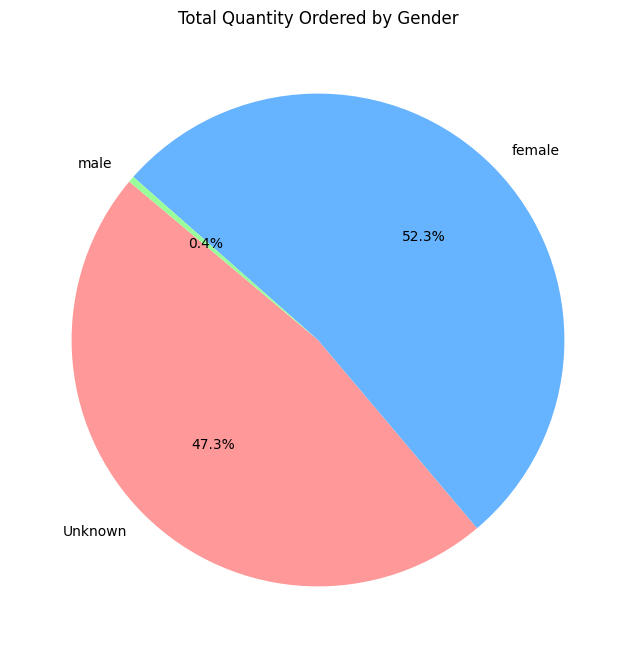

In [35]:
# Quantity ordered by gender

quantity_by_gender = data.groupby('Product gender')['Quantity of SKU'].sum()

plt.figure(figsize=(8, 8))
plt.pie(quantity_by_gender.values, labels=quantity_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Total Quantity Ordered by Gender')
plt.show()

#### Observations & Business Insights
1️⃣ Quantity Ordered by Gender
Females dominate jewelry purchases, accounting for 47,379 SKUs, significantly higher than male buyers (364 SKUs).

There is a large “Unknown” category (42,815 SKUs), likely due to missing or improperly recorded gender data.

#### Business Insights
Marketing Focus: Since women make up the majority of buyers, targeted advertising and personalized promotions for female customers could enhance engagement and conversions.

Data Quality: The high number of “Unknown” entries suggests missing or incomplete customer data. Improving data collection—through better form designs or customer profiling—can enhance personalized pricing strategies.

Male Market Opportunity: Male customers represent less than 1% of total purchases, indicating a potential untapped market for men’s jewelry. Introducing marketing campaigns, product bundling (e.g., watches & accessories), and luxury branding for male buyers may help increase demand

#### Distribution of Jewelry Prices

In [36]:
# To Calculate the price distribution
#counts, bin_edges = np.histogram(data['Price in USD'], bins=50)

#for i in range(len(bin_edges) - 1):
    #print(f"Price Range: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}, Count: {counts[i]}")

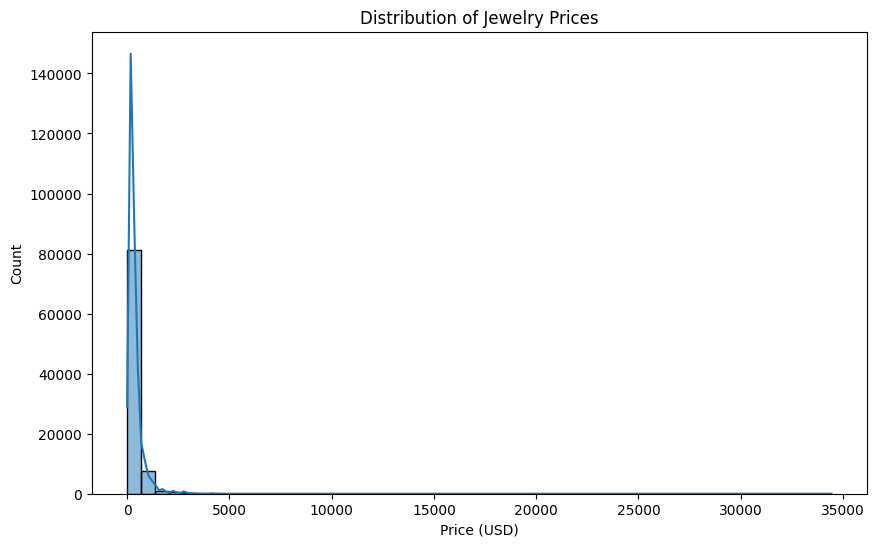

In [37]:

plt.figure(figsize=(10,6))
sns.histplot(data['Price in USD'], bins=50, kde=True)
plt.title('Distribution of Jewelry Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()

In [38]:
# Apply log transformation to Calculate the price distribution
#log_prices = np.log1p(data['Price in USD'].astype(float))

#counts, bin_edges = np.histogram(log_prices, bins=50)

#for i in range(len(bin_edges) - 1):
    #print(f"Log(Price + 1) Range: {bin_edges[i]:.4f} - {bin_edges[i+1]:.4f}, Count: {counts[i]}")

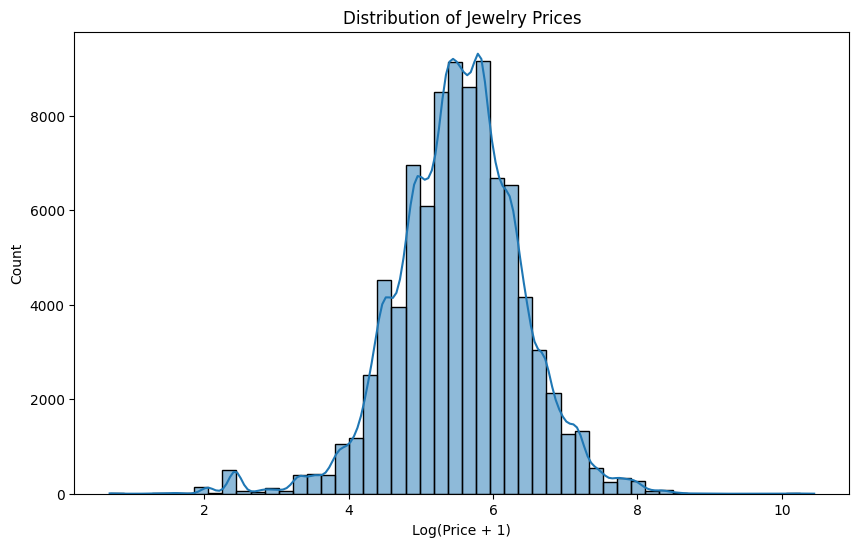

In [39]:
# Log-Scaled Price Distribution

plt.figure(figsize=(10,6))
sns.histplot(data['Price in USD'].apply(lambda x: float(x)).apply(np.log1p), bins=50, kde=True)
plt.title('Distribution of Jewelry Prices')
plt.xlabel('Log(Price + 1)')
plt.show()

####  Jewelry Price Range Distribution

In [40]:
price_group_counts = data["Price_Range"].value_counts().sort_values(ascending=False)
price_group_counts

Price_Range
$101-$500      61124
$501-$1000     12954
$50-$100        8958
$1001-$2000     3712
<$50            2907
$2001-$3000      674
>$3001           229
Name: count, dtype: int64

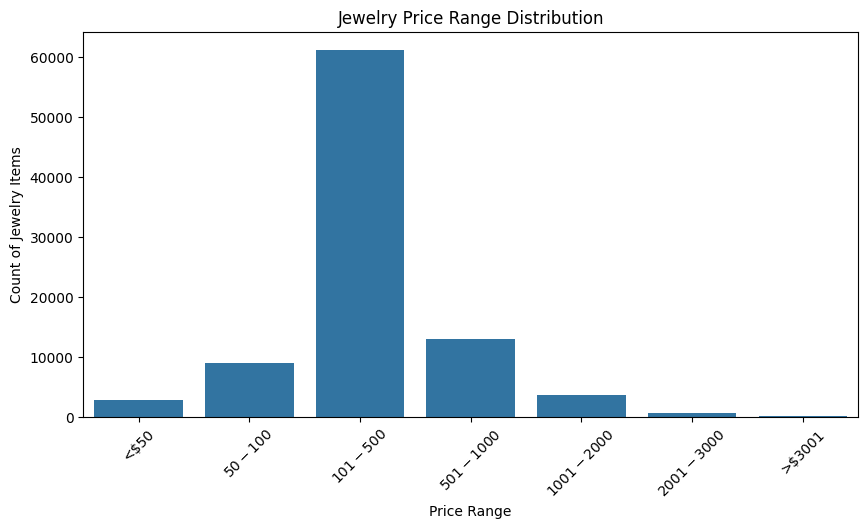

In [41]:
#price_group_counts = data["Jewelry Price Group"].value_counts().sort_index()
price_group_counts = data["Price_Range"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=price_group_counts.index, y=price_group_counts.values)

plt.title("Jewelry Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Count of Jewelry Items")
plt.xticks(rotation=45) 

plt.show()

#### Observations & Business Insights
- Mid-Range Jewelry ($101–$500) Dominates the Market
The highest sales volume (61,124 SKUs) falls within this price range.This indicates that customers prefer affordable luxury, balancing quality and cost.

**Business Strategy: Since this segment drives the most sales, expand product offerings in this range, enhance marketing campaigns, and introduce bundle deals to further boost purchases.

- High-End Jewelry (>$3,001) has limited demands
Only 229 SKUs fall above $3,001, showing lower consumer interest in ultra-luxury pieces.This suggests that premium jewelry sales are more exclusive and require a niche marketing approach.

**Actionable Insight: Invest in exclusive branding, VIP concierge services, and custom designs to enhance desirability and justify premium pricing.

- Affordable Jewelry (<$100) Is a Growing Segment
11,865 SKUs are priced under $100, highlighting strong interest in entry-level jewelry.This segment can serve as a gateway to higher-end purchases.

**Business Opportunity: Introduce subscription models, gift collections, and promotional discounts to attract new customers who may later invest in mid-to-premium priced items.

#### Demand Trends – Quantity Ordered by Product or Category

In [42]:
quantity_by_category = data.groupby('Category alias')['Quantity of SKU'].sum().sort_values(ascending=False)
quantity_by_category

Category alias
jewelry.earring       29051
jewelry.ring          28300
jewelry.pendant       13088
Unknown                9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: Quantity of SKU, dtype: int64

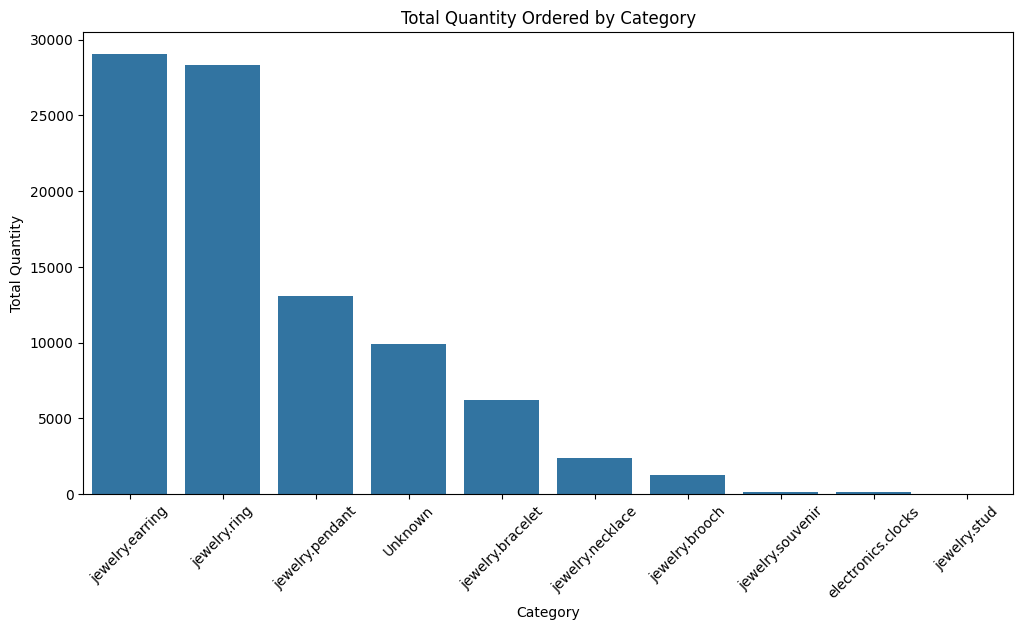

In [43]:
quantity_by_category = data.groupby('Category alias')['Quantity of SKU'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=quantity_by_category.index, y=quantity_by_category.values)
plt.xticks(rotation=45)
plt.title('Total Quantity Ordered by Category')
plt.ylabel('Total Quantity')
plt.xlabel('Category')
plt.show()

#### Observations & Business Insights
1. Earrings & Rings Dominate Sales
Earrings (29,051 SKUs) and Rings (28,300 SKUs) are the highest-selling jewelry categories.

**Business Strategy

- Prioritize marketing campaigns and product expansion in these categories.
- Introduce personalized/custom designs to drive engagement.
- Consider bundling earrings & rings as gift sets, given their popularity.
  
2. Pendants & Bracelets Show Moderate Demand
Pendants (13,088 SKUs) and Bracelets (6,188 SKUs) are mid-tier in sales volume.This suggests specific customer segments prefer these accessories.

**Actionable Insight
- Explore price optimization strategies or exclusive collections for pendants & bracelets.
-Target niche customers (e.g., premium/luxury buyers vs. casual shoppers).
-Improve cross-selling—offer pendants with matching bracelets to boost sales.

3. Necklaces, Brooches & Souvenirs Have Lower Demand
Necklaces (2,361 SKUs), Brooches (1,288 SKUs), and Souvenirs (170 SKUs) see relatively low sales.These items may be seasonal purchases or have limited mainstream appeal.

4. High "Unknown" Category (9,933 SKUs) Indicates Data Gaps
A significant portion of sales data lacks proper category labels.This affects pricing insights, inventory planning, and demand forecasting.

**Data Management Fixes
- Improve data collection accuracy in inventory tracking systems.
- Implement standardized product categorization to reduce unknown entries.
- Conduct customer behavior analysis to determine hidden trends within "Unknown" products.

#### Average Price by Main Metal or Main Gem

In [44]:
# Average price by metal
avg_price_metal = data.groupby('Main metal')['Price in USD'].mean().sort_values(ascending=False)
avg_price_metal

Main metal
platinum    845.205000
gold        367.008517
Unknown     108.067091
silver       69.027722
Name: Price in USD, dtype: float64

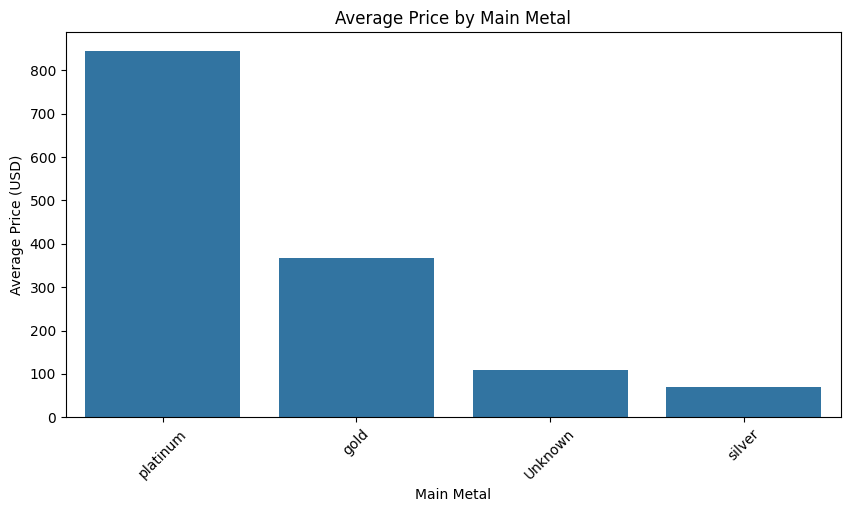

In [45]:
# Average price by metal
avg_price_metal = data.groupby('Main metal')['Price in USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_metal.index, y=avg_price_metal.values)
plt.title('Average Price by Main Metal')
plt.ylabel('Average Price (USD)')
plt.xlabel('Main Metal')
plt.xticks(rotation=45)
plt.show()

#### Observations & Business Insights
1. Platinum Commands the Highest Price ($845.21) Platinum jewelry is the most expensive, averaging $845.21 per piece.

**Business Strategy:
- Position platinum pieces as high-end luxury items with exclusive branding.
- Offer customization & personalization options to reinforce exclusivity.
- Target premium buyers—celebrity endorsements & VIP collections could elevate appeal.

2. Gold Maintains Mid-High Pricing ($367.01) Gold is significantly cheaper than platinum, but still in the luxury category.Its historical value and versatility make it a strong investment piece.

**Optimization Approach:
- Introduce investment-grade gold collections to attract long-term buyers.
- Offer tiered pricing—higher purity gold (24K) for premium customers, 18K for affordability.
- Use seasonal pricing models—holidays and cultural events often drive demand.

3. Silver is the Most Affordable Precious Metal ($69.03) Lower price may indicate high demand for everyday jewelry vs. luxury purchases.

**Marketing Opportunities:
-Expand affordable silver collections to attract younger or first-time buyers.
- Position silver as casual, trendy, and versatile, ideal for mass-market sales.
- Implement bundling strategies—selling silver in sets (rings + earrings) to increase volume.

4. Significant "Unknown" Category ($108.07) The “Unknown” metal group has an average price higher than silver but lower than gold.

**Data Improvement Measures:
-Standardize product cataloging to ensure metals are correctly labeled.
- Clean up data inconsistencies to enhance pricing models and business decisions

In [46]:
# Average price by gem

avg_price_metal = data.groupby('Main gem')['Price in USD'].mean().sort_values(ascending=False)
avg_price_metal

Main gem
rhodolite              1349.350000
sitall                  958.126591
mix                     889.915754
agate                   666.422500
diamond                 502.091160
onyx                    432.855000
emerald                 415.910444
garnet_synthetic        378.856667
garnet                  377.162097
amethyst                364.314338
quartz                  354.831944
topaz                   346.032007
ruby                    339.810464
quartz_smoky            339.454301
pearl                   325.167362
sapphire                318.097481
nanocrystal             315.813295
amber                   303.058553
turquoise               295.579091
corundum_synthetic      283.381220
Unknown                 278.571798
tourmaline              255.179000
nacre                   246.761923
sapphire_geothermal     232.740000
chrysoprase             209.068333
fianit                  179.088756
citrine                 164.623725
chrysolite              159.737703
emerald_geo

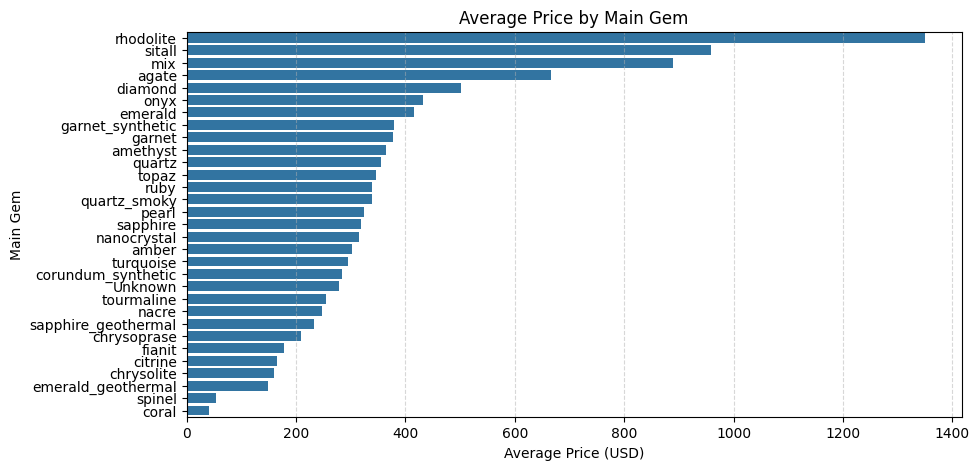

In [47]:
# Average price by gem

avg_price_metal = data.groupby('Main gem')['Price in USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y=avg_price_metal.index, x=avg_price_metal.values)
plt.title('Average Price by Main Gem')
plt.xlabel('Average Price (USD)')
plt.ylabel('Main Gem')
plt.grid(axis='x', linestyle='--', alpha=0.5)  
plt.show()


#### Time-based Analysis

In [48]:
import pandas as pd

# Extract year and month for grouping
data["Year"] = pd.to_datetime(data["Order datetime"]).dt.year  # Extract year
data["Month"] = pd.to_datetime(data["Order datetime"]).dt.month  # Extract numeric month

# Group by Year and Month to calculate average price trends
monthly_prices = data.groupby(["Year", "Month"])["Price in USD"].mean().reset_index()
print(monthly_prices.head())

   Year  Month  Price in USD
0  2018     12    275.820331
1  2019      1    338.289594
2  2019      2    308.455571
3  2019      3    341.021289
4  2019      4    340.388826


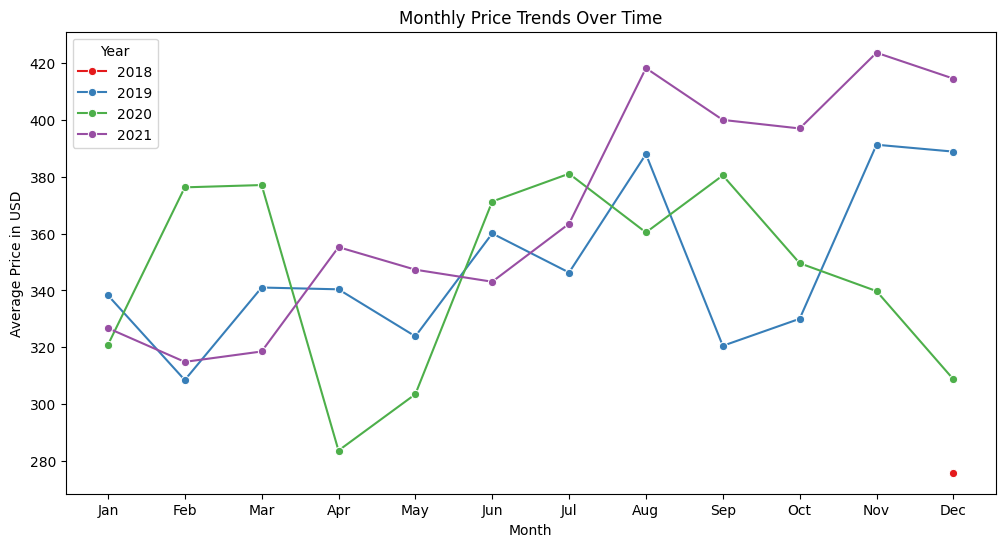

In [49]:
# Monthly Price Trends by Months and Years

custom_palette = sns.color_palette("Set1") 

plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Price in USD", hue="Year", data=monthly_prices, marker="o", palette=custom_palette)

plt.title("Monthly Price Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Average Price in USD")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()

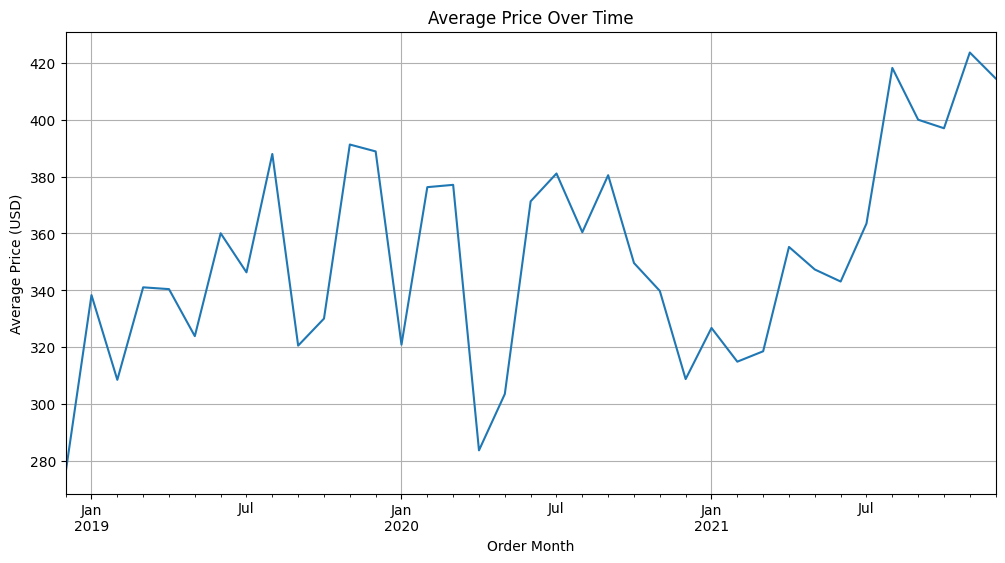

In [50]:
# Average Monthly price trends
data['Order Month'] = data['Order datetime'].dt.to_period('M')
monthly_avg_price = data.groupby('Order Month')['Price in USD'].mean()

monthly_avg_price.plot(kind='line', figsize=(12,6), title='Average Price Over Time')
plt.ylabel('Average Price (USD)')
plt.xlabel('Order Month')
plt.grid(True)
plt.show()

# Feature Engineering

In [51]:
print(data.columns.tolist())


['Order datetime', 'Quantity of SKU', 'Category alias', 'Price in USD', 'Product gender', 'Main Color', 'Main metal', 'Main gem', 'Price_Range', 'Month', 'MonthName', 'Year', 'Order Month']


In [52]:
print(data.dtypes)


Order datetime     datetime64[ns, UTC]
Quantity of SKU                  int64
Category alias                  object
Price in USD                   float64
Product gender                  object
Main Color                      object
Main metal                      object
Main gem                        object
Price_Range                   category
Month                            int32
MonthName                       object
Year                             int32
Order Month                  period[M]
dtype: object


In [53]:
# Convert Order Month 
data["Order Month"] = pd.to_datetime(data["Order Month"], errors="coerce").dt.month
data["Order Month"] = data["Order Month"].fillna(0).astype("int32")  # Replace NaNs with 0 before conversion

# Convert Order datetime 
data["Order datetime"] = pd.to_datetime(data["Order datetime"], errors="coerce").dt.month
data["Order datetime"] = data["Order datetime"].fillna(0).astype("int32")


In [54]:
print(data.dtypes)

Order datetime        int32
Quantity of SKU       int64
Category alias       object
Price in USD        float64
Product gender       object
Main Color           object
Main metal           object
Main gem             object
Price_Range        category
Month                 int32
MonthName            object
Year                  int32
Order Month           int32
dtype: object


In [55]:
#!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder

In [56]:
# Define the categorical columns to encode

categorical_cols = [
    'Category alias',  
    'Product gender', 
    'Main Color', 
    'Main metal', 
    'Main gem',
    'Order Month',
    'Price_Range'
]

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Order datetime,Quantity of SKU,Price in USD,Month,MonthName,Year,Category alias_electronics.clocks,Category alias_jewelry.bracelet,Category alias_jewelry.brooch,Category alias_jewelry.earring,...,Main gem_spinel,Main gem_topaz,Main gem_tourmaline,Main gem_turquoise,Price_Range_$50-$100,Price_Range_$101-$500,Price_Range_$501-$1000,Price_Range_$1001-$2000,Price_Range_$2001-$3000,Price_Range_>$3001
0,12,1,212.14,12,December,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,12,1,54.66,12,December,2018,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,12,1,88.90,12,December,2018,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12,1,417.67,12,December,2018,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,12,1,102.27,12,December,2018,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95904,12,1,134.29,12,December,2021,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
95906,12,1,229.99,12,December,2021,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
95907,12,1,630.00,12,December,2021,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
95908,12,1,83.42,12,December,2021,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [57]:
### Define Features (X) and Target (y)

# One-hot encode 'MonthName' to handle non-numeric values
data_encoded = pd.get_dummies(data_encoded, columns=['MonthName'], drop_first=True)

# Define the target variable

X = data_encoded.drop(columns=['Price in USD'])
y = data_encoded['Price in USD'].astype(float)

### Train/Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
print('\n', X_train.head())
print('\n', X_test.head())
print('\n', y_train.head())
print('\n', y_test.head())


        Order datetime  Quantity of SKU  Month  Year  \
26194               9                1      9  2020   
433                 1                1      1  2019   
90972              11                1     11  2021   
35722              12                1     12  2020   
81401              10                1     10  2021   

       Category alias_electronics.clocks  Category alias_jewelry.bracelet  \
26194                              False                            False   
433                                False                            False   
90972                              False                            False   
35722                              False                            False   
81401                              False                            False   

       Category alias_jewelry.brooch  Category alias_jewelry.earring  \
26194                          False                           False   
433                            False                        

### Train my Model

#### Random Forest Regressor

In [60]:
# import the random forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# Create model

RF_model = RandomForestRegressor()

In [62]:
# Fit the model

RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
# Create the prediction

RF_preds = RF_model.predict(X_test)

In [64]:
# Evaluate the Model

mae = mean_absolute_error(y_test, RF_preds)
mse = mean_squared_error(y_test, RF_preds)
r2 = r2_score(y_test, RF_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 68.50
Mean Squared Error: 10988.56
R2 Score: 0.92


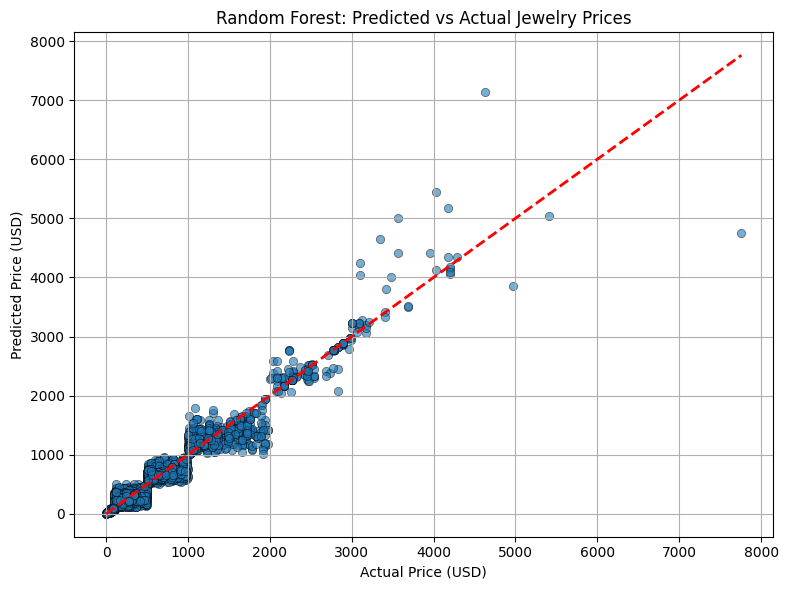

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=RF_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Random Forest: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### CatBoost Regressor (CatBoostRegressor)

In [66]:
# !pip install catboost

In [67]:
# Import Libraries
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Train the Model

In [68]:
# Create the model - CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)


In [69]:
# Fit the model
cat_model.fit(X_train, y_train)


In [70]:
# Predict the test set
cat_preds = cat_model.predict(X_test)


In [71]:
# Evaluate the Model

mae = mean_absolute_error(y_test, cat_preds)
mse = mean_squared_error(y_test, cat_preds)
r2 = r2_score(y_test, cat_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 71.65
Mean Squared Error: 10896.39
R2 Score: 0.92


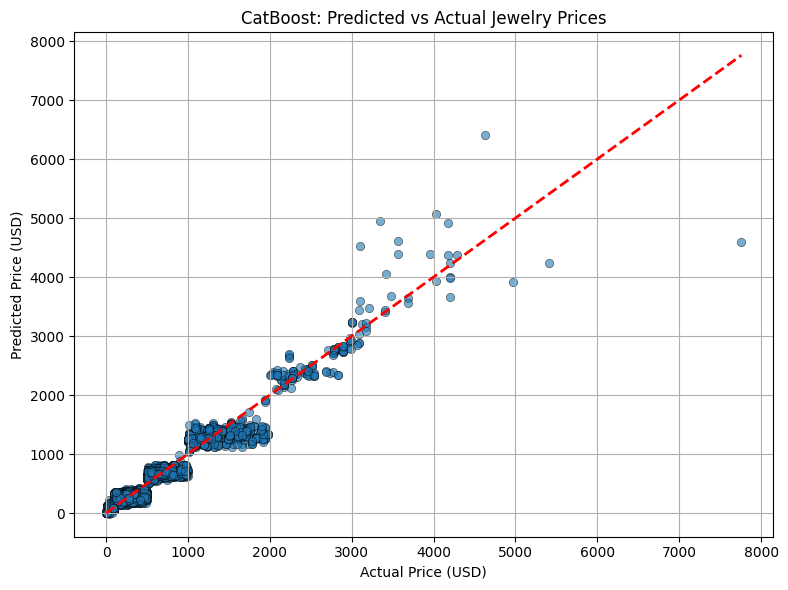

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=cat_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('CatBoost: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Extra Trees Regressor

In [73]:
#!pip install scikit-learn


In [74]:
# Import Libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Train the Model

In [75]:
# Create the model - Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42)

In [76]:
# Fit the model
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [77]:
# # Predict the test set
et_preds = et_model.predict(X_test)

In [78]:
# Evaluate the Model
mae = mean_absolute_error(y_test, et_preds)
mse = mean_squared_error(y_test, et_preds)
r2 = r2_score(y_test, et_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 68.48
Mean Squared Error: 11545.65
R2 Score: 0.92


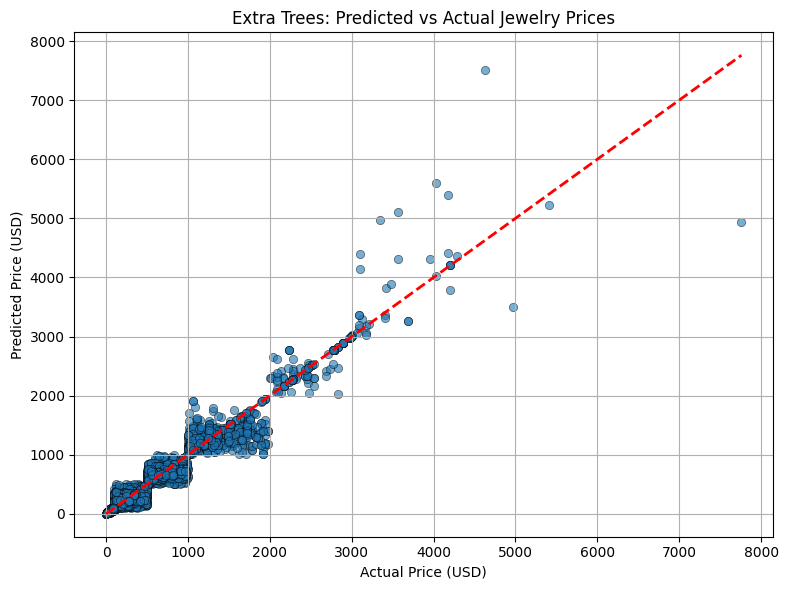

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=et_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Extra Trees: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Lets compare the performance of the 3 models
-  Random Forest Regressor
- CatBoost Regressor
- ExtraTrees Regressor

In [80]:
model_results = {
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, RF_preds),
        'MSE': mean_squared_error(y_test, RF_preds),
        'R2': r2_score(y_test, RF_preds)
    },
    'CatBoost': {
        'MAE': mean_absolute_error(y_test, cat_preds),
        'MSE': mean_squared_error(y_test, cat_preds),
        'R2': r2_score(y_test, cat_preds)
    },
    'Extra Trees': {
        'MAE': mean_absolute_error(y_test, et_preds),
        'MSE': mean_squared_error(y_test, et_preds),
        'R2': r2_score(y_test, et_preds)
    }
}


In [81]:
# Convert to DataFrame for Easy Plotting

results_data = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})
print(results_data)


           Model        MAE           MSE        R2
0  Random Forest  68.501818  10988.561200  0.921616
1       CatBoost  71.654405  10896.387905  0.922273
2    Extra Trees  68.479316  11545.654296  0.917642


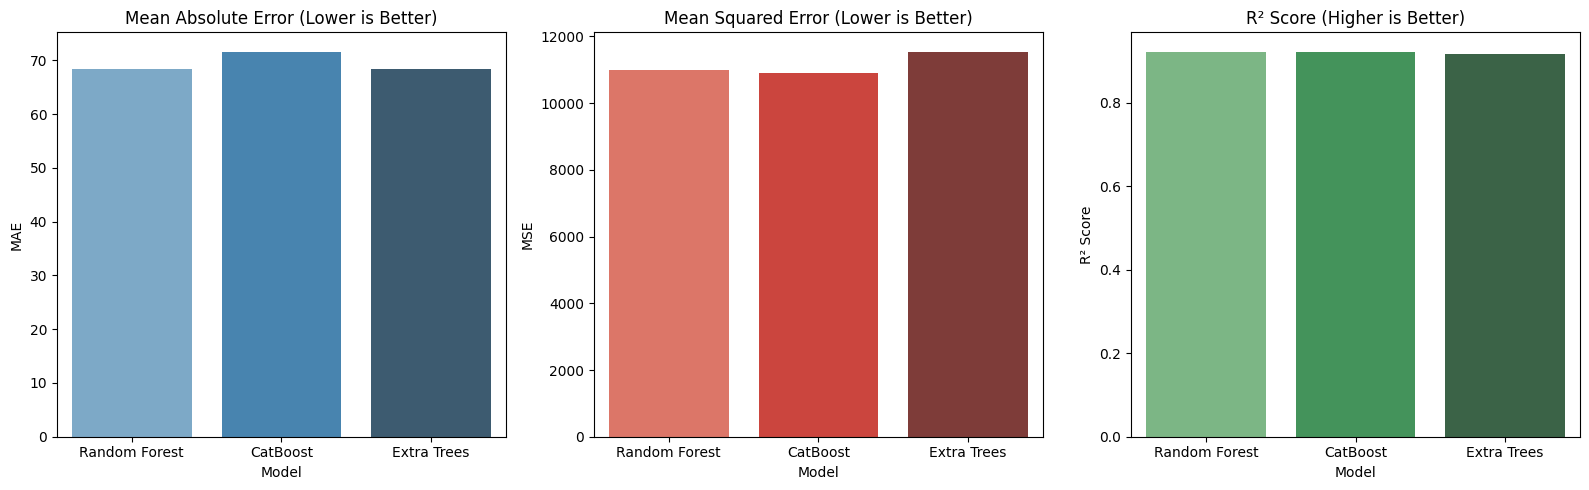

In [82]:
plt.figure(figsize=(16, 5))

# MAE - Mean Absolute Error
plt.subplot(1, 3, 1)
sns.barplot(data=results_data, x='Model', y='MAE', palette='Blues_d')
plt.title('Mean Absolute Error (Lower is Better)')
plt.ylabel('MAE')

# MSE - Mean Squared Error
plt.subplot(1, 3, 2)
sns.barplot(data=results_data, x='Model', y='MSE', palette='Reds_d')
plt.title('Mean Squared Error (Lower is Better)')
plt.ylabel('MSE')

# R² Score
plt.subplot(1, 3, 3)
sns.barplot(data=results_data, x='Model', y='R2', palette='Greens_d')
plt.title('R² Score (Higher is Better)')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

### Log Models with MLflow

In [83]:
#!pip install mlflow

In [84]:
# Import & Set Up MLflow
import mlflow
import mlflow.sklearn

In [85]:
mlflow.set_experiment("Jewelry Price Prediction Models")

<Experiment: artifact_location='file:///C:/Users/IfeomaAugustaAdigwe/Desktop/JewlryPriceOptimisation/notebooks/mlruns/376710469044946944', creation_time=1747763383009, experiment_id='376710469044946944', last_update_time=1747763383009, lifecycle_stage='active', name='Jewelry Price Prediction Models', tags={}>

##### Create a Logging Function

In [86]:
from mlflow.models.signature import infer_signature

def log_model(model, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Fit the model
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Compute metrics
        mae = mean_absolute_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log params & metrics
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R2", r2)

        # Infer signature & log model with example
        signature = infer_signature(X_train, preds)
        input_example = X_train.iloc[0:1]  # First row as example

        try:
            if "catboost" in str(type(model)).lower():
                mlflow.catboost.log_model(
                    model, 
                    artifact_path=model_name,
                    signature=signature,
                    input_example=input_example
                )
            else:
                mlflow.sklearn.log_model(
                    model, 
                    artifact_path=model_name,
                    signature=signature,
                    input_example=input_example
                )
            
            print(f"✅ Model '{model_name}' logged successfully with signature & example.")
        except Exception as e:
            print(f"❌ Failed to log model: {e}")

        print(f"{model_name} metrics:")
        print(f"  MAE: {mae:.2f} | MSE: {mse:.2f} | R²: {r2:.2f}")


#### Log Each Model to MLFlow

In [87]:
# Random Forest Regressor

if mlflow.active_run():
    mlflow.end_run()  

log_model(RandomForestRegressor(random_state=42), "RandomForest", X_train, X_test, y_train, y_test)

✅ Model 'RandomForest' logged successfully with signature & example.
RandomForest metrics:
  MAE: 68.47 | MSE: 10596.06 | R²: 0.92


In [88]:
# CatBoost Regressor

if mlflow.active_run():
    mlflow.end_run() 
    
log_model(CatBoostRegressor(verbose=0, random_state=42), "CatBoost", X_train, X_test, y_train, y_test)

✅ Model 'CatBoost' logged successfully with signature & example.
CatBoost metrics:
  MAE: 71.65 | MSE: 10896.39 | R²: 0.92


In [89]:
# Extra Trees Regressor

if mlflow.active_run():
    mlflow.end_run() 
    
log_model(ExtraTreesRegressor(random_state=42), "ExtraTrees", X_train, X_test, y_train, y_test)

✅ Model 'ExtraTrees' logged successfully with signature & example.
ExtraTrees metrics:
  MAE: 68.48 | MSE: 11545.65 | R²: 0.92


#### Get Best Perfoming Model

In [90]:
models = {
    "RandomForest": RF_model,
    "CatBoost": cat_model,
    "ExtraTrees": et_model
}

In [91]:
from sklearn.metrics import mean_absolute_error

best_model_name, best_model = min(
    models.items(),
    key=lambda item: mean_absolute_error(y_test, item[1].predict(X_test))
)

print(f"Best Model: {best_model_name}")

Best Model: ExtraTrees


### MLFlow Tracking

In [92]:
mlflow.get_tracking_uri()

'file:///C:/Users/IfeomaAugustaAdigwe/Desktop/JewlryPriceOptimisation/notebooks/mlruns'

In [93]:
import mlflow
experiments = mlflow.search_experiments()
for exp in experiments:
    print(f"Experiment ID: {exp.experiment_id}, Name: {exp.name}")


Experiment ID: 551712897646601785, Name: Jewelry_Price_Optmimization_with_ML
Experiment ID: 376710469044946944, Name: Jewelry Price Prediction Models
Experiment ID: 0, Name: Default


In [94]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
artifact_uri = client.get_run("9ffc075721e146a498fcb4f9ecd56e44").info.artifact_uri
print(f"Model saved at: {artifact_uri}")

Model saved at: file:///C:/Users/IfeomaAugustaAdigwe/Desktop/JewlryPriceOptimisation/notebooks/mlruns/376710469044946944/9ffc075721e146a498fcb4f9ecd56e44/artifacts


In [104]:
bad_runs = ["0d658562c7f545b39af2c70746368dd9"]
for run_id in bad_runs:
    client.delete_run(run_id)
print("Cleaned up rogue runs!")

Cleaned up rogue runs!


In [105]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
runs = client.search_runs("376710469044946944")  # Your experiment_id

for run in runs:
    print(f"Run Name: {run.info.run_name}")
    print(f"Run ID: {run.info.run_id}")
    print(f"MAE: {run.data.metrics.get('MAE')}")
    print(f"Model Path: runs:/{run.info.run_id}/{run.info.run_name}_model")
    print("-----")

Run Name: ExtraTrees
Run ID: e3bcbd43c043444b8b7a52850953c41a
MAE: 68.47931630767569
Model Path: runs:/e3bcbd43c043444b8b7a52850953c41a/ExtraTrees_model
-----
Run Name: CatBoost
Run ID: 7e8d1858479443449b68f18f40764309
MAE: 71.65440486463737
Model Path: runs:/7e8d1858479443449b68f18f40764309/CatBoost_model
-----
Run Name: RandomForest
Run ID: 13705171a73b4086882c4a41964e9e21
MAE: 68.46829838154696
Model Path: runs:/13705171a73b4086882c4a41964e9e21/RandomForest_model
-----


In [106]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
runs = client.search_runs("376710469044946944")

# Keep only the first occurrence of each model type
seen_models = set()
for run in runs:
    model_name = run.info.run_name
    if model_name not in seen_models:
        seen_models.add(model_name)
    else:
        print(f"Deleting duplicate: {model_name} (Run ID: {run.info.run_id})")
        client.delete_run(run.info.run_id)

In [107]:
remaining_runs = client.search_runs("376710469044946944")
print(f"Total runs after cleanup: {len(remaining_runs)}")  # Should be 3 (1 per model)

for run in remaining_runs:
    print(f"Model: {run.info.run_name} (Run ID: {run.info.run_id})")

Total runs after cleanup: 3
Model: ExtraTrees (Run ID: e3bcbd43c043444b8b7a52850953c41a)
Model: CatBoost (Run ID: 7e8d1858479443449b68f18f40764309)
Model: RandomForest (Run ID: 13705171a73b4086882c4a41964e9e21)


In [108]:
try:
    mlflow.sklearn.log_model(model, artifact_path=model_name)
except Exception as e:
    print(f"Failed to log model: {e}")

Failed to log model: name 'model' is not defined


In [99]:

client = MlflowClient()
client.download_artifacts(run_id="1b8cfb041659415e98bd72ab83ebda04", path="ExtraTrees/model.pkl", dst_path=".")

'C:\\Users\\IfeomaAugustaAdigwe\\Desktop\\JewlryPriceOptimisation\\notebooks\\ExtraTrees/model.pkl'

In [100]:
import os
downloaded_path = r"C:\Users\IfeomaAugustaAdigwe\Desktop\JewlryPriceOptimisation\notebooks\ExtraTrees\model.pkl"
print("File exists?", os.path.exists(downloaded_path))  # Should return True

File exists? True


In [101]:
# Check for the artifact path in mlflow - ExtraTree

client = MlflowClient()
run_id = "4434355d79084b21bb1d5038a3847896"

# List all artifact files
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print(artifact.path)
    
    # For directories, list their contents
    if artifact.is_dir:
        sub_artifacts = client.list_artifacts(run_id, artifact.path)
        for sub in sub_artifacts:
            print(f"  → {sub.path}")

ExtraTrees
  → ExtraTrees/MLmodel
  → ExtraTrees/conda.yaml
  → ExtraTrees/input_example.json
  → ExtraTrees/model.pkl
  → ExtraTrees/python_env.yaml
  → ExtraTrees/requirements.txt
  → ExtraTrees/serving_input_example.json


In [102]:
# Check for the artifact path in mlflow - CatBoost

client = MlflowClient()
run_id = "a48cb13ebecc4dc0a1e7ff65be928cc6"

# List all artifact files
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print(artifact.path)
    
    # For directories, list their contents
    if artifact.is_dir:
        sub_artifacts = client.list_artifacts(run_id, artifact.path)
        for sub in sub_artifacts:
            print(f"  → {sub.path}")

CatBoost
  → CatBoost/MLmodel
  → CatBoost/conda.yaml
  → CatBoost/input_example.json
  → CatBoost/model.cb
  → CatBoost/python_env.yaml
  → CatBoost/requirements.txt
  → CatBoost/serving_input_example.json


In [103]:
# Check for the artifact path in mlflow - Random Forest

client = MlflowClient()
run_id = "85be788061034598a58796a9d1a85485"

# List all artifact files
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print(artifact.path)
    
    # For directories, list their contents
    if artifact.is_dir:
        sub_artifacts = client.list_artifacts(run_id, artifact.path)
        for sub in sub_artifacts:
            print(f"  → {sub.path}")

RandomForest
  → RandomForest/MLmodel
  → RandomForest/conda.yaml
  → RandomForest/input_example.json
  → RandomForest/model.pkl
  → RandomForest/python_env.yaml
  → RandomForest/requirements.txt
  → RandomForest/serving_input_example.json
